In [1]:
using Distributions
using Optim
using QuadGK
using Random
using StatsPlots
default(fmt=:png, titlefontsize=10, size=(500, 300))

$X,Y\sim\mathrm{Uniform}(0,1)$ が独立ならば $Z=X/Y$ が従う分布の密度函数は次になる:

$$
f(z) = \begin{cases}
0 & (z < 0) \\
1/2 & (0\le z\le 1) \\
1/(2z^2) & (1 \le z) \\
\end{cases}
$$

In [2]:
f(z) = z < 0 ? 0.0 : 0 ≤ z ≤ 1 ? 1/2 : 1/(2z^2)
quadgk(f, 0, 1, Inf)

(1.0, 4.226984873234585e-10)

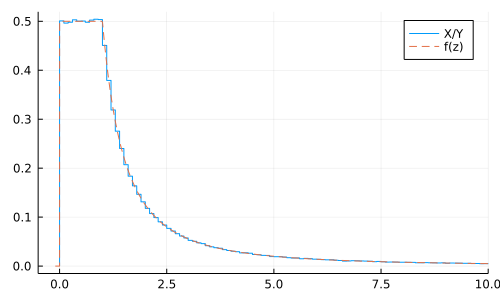

In [3]:
n = 10^6
X = rand(Uniform(0, 1), n)
Y = rand(Uniform(0, 1), n)
Z = X ./ Y
stephist(Z; norm=true, bin=[0:0.1:30; Inf], label="X/Y")
plot!(f, -0.1, 30; label="f(z)", xlim=(-0.5, 10), ls=:dash)

$X,Y\sim\mathrm{Uniform}(-1,1)$ が独立ならば $Z=X/Y$ が従う分布の密度函数は次になる:

$$
g(z) = \begin{cases}
1/4 & (|z|\le 1) \\
1/(4z^2) & (1 \le |z|) \\
\end{cases}
$$

In [4]:
g(z) = abs(z) ≤ 1 ? 1/4 : 1/(4z^2)
quadgk(f, -Inf, -1, 0, 1, Inf)

(1.0000000000000004, 1.4465360298476782e-8)

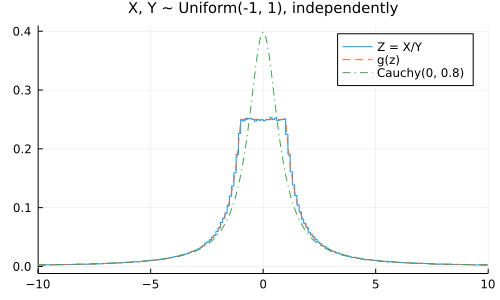

In [5]:
n = 10^6
X = rand(Uniform(-1, 1), n)
Y = rand(Uniform(-1, 1), n)
Z = X ./ Y
stephist(Z; norm=true, bin=[-Inf; -30:0.1:30; Inf], label="Z = X/Y")
plot!(g, -30, 30; label="g(z)", xlim=(-10, 10), ls=:dash)
plot!(Cauchy(0, 0.8), -10, 10; label="Cauchy(0, 0.8)", ls=:dashdot)
plot!(xlim=(-10, 10))
title!("X, Y ~ Uniform(-1, 1), independently")

  0.172274 seconds (705.31 k allocations: 55.893 MiB, 11.11% gc time, 39.94% compilation time)


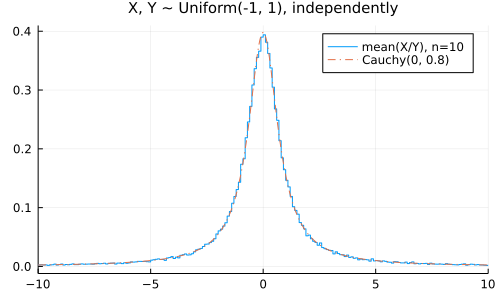

In [6]:
n, L = 10, 10^5
@time meanZ = [mean(rand(Uniform(-1, 1), n) ./ rand(Uniform(-1, 1), n)) for _ in 1:L]

stephist(meanZ; norm=true, bin=[-Inf; -10^4:0.1:10^4; Inf], label="mean(X/Y), n=$n")
plot!(Cauchy(0, 0.8), -10, 10; label="Cauchy(0, 0.8)", ls=:dashdot)
plot!(xlim=(-10, 10))
title!("X, Y ~ Uniform(-1, 1), independently")

  0.296200 seconds (647.77 k allocations: 267.246 MiB, 27.28% gc time, 11.24% compilation time)


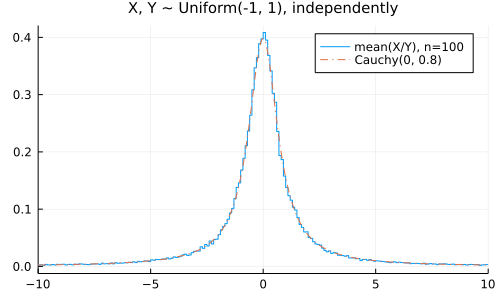

In [7]:
n, L = 100, 10^5
@time meanZ = [mean(rand(Uniform(-1, 1), n) ./ rand(Uniform(-1, 1), n)) for _ in 1:L]

stephist(meanZ; norm=true, bin=[-Inf; -10^4:0.1:10^4; Inf], label="mean(X/Y), n=$n")
plot!(Cauchy(0, 0.8), -10, 10; label="Cauchy(0, 0.8)", ls=:dashdot)
plot!(xlim=(-10, 10))
title!("X, Y ~ Uniform(-1, 1), independently")

  1.379934 seconds (647.76 k allocations: 2.282 GiB, 26.07% gc time, 2.44% compilation time)


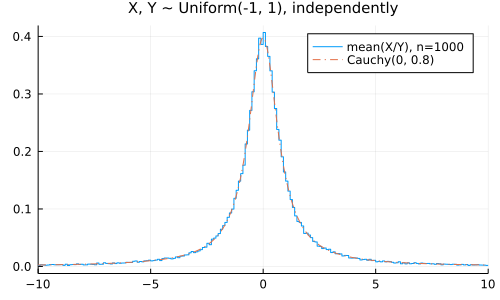

In [8]:
n, L = 1000, 10^5
@time meanZ = [mean(rand(Uniform(-1, 1), n) ./ rand(Uniform(-1, 1), n)) for _ in 1:L]

stephist(meanZ; norm=true, bin=[-Inf; -10^4:0.1:10^4; Inf], label="mean(X/Y), n=$n")
plot!(Cauchy(0, 0.8), -10, 10; label="Cauchy(0, 0.8)", ls=:dashdot)
plot!(xlim=(-10, 10))
title!("X, Y ~ Uniform(-1, 1), independently")

  8.968345 seconds (947.76 k allocations: 22.376 GiB, 14.96% gc time, 0.36% compilation time)


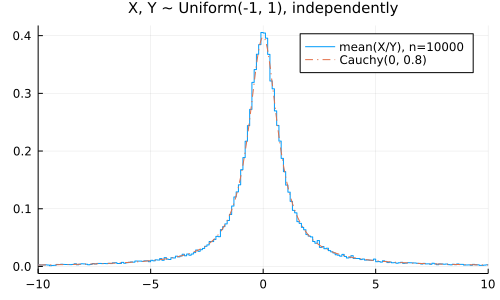

In [9]:
n, L = 10000, 10^5
@time meanZ = [mean(rand(Uniform(-1, 1), n) ./ rand(Uniform(-1, 1), n)) for _ in 1:L]

stephist(meanZ; norm=true, bin=[-Inf; -10^4:0.1:10^4; Inf], label="mean(X/Y), n=$n")
plot!(Cauchy(0, 0.8), -10, 10; label="Cauchy(0, 0.8)", ls=:dashdot)
plot!(xlim=(-10, 10))
title!("X, Y ~ Uniform(-1, 1), independently")

In [10]:
n = 10^6
X = rand(Uniform(-1, 1), n)
Y = rand(Uniform(-1, 1), n)
Z = X ./ Y

@time o = optimize(w -> -loglikelihood(Cauchy(w[1], w[2]), Z), [0.0, 1.0])
@show o
@show o.minimizer;

  2.587446 seconds (4.95 M allocations: 250.601 MiB, 1.40% gc time, 42.98% compilation time)
o =  * Status: success

 * Candidate solution
    Final objective value:     2.409192e+06

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    41
    f(x) calls:    82

o.minimizer = [0.0003531323620711427, 1.0017091588051268]


In [11]:
# 計算効率を度外視のコード (巨大なメモリアロケーション！非常に遅い！)

n, L = 10^4, 10^6
@time meanZ = [mean(rand(Uniform(-1, 1), n) ./ rand(Uniform(-1, 1), n)) for _ in 1:L]

@time o = optimize(w -> -loglikelihood(Cauchy(w[1], w[2]), meanZ), [0.0, 1.0])
@show o
@show o.minimizer;

 79.017155 seconds (9.05 M allocations: 223.736 GiB, 17.39% gc time, 0.04% compilation time)
  1.450009 seconds (5.29 k allocations: 285.966 KiB, 0.46% compilation time)
o =  * Status: success

 * Candidate solution
    Final objective value:     2.292882e+06

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    37
    f(x) calls:    76

o.minimizer = [-0.0014121883992551285, 0.786119058566279]


In [12]:
# 巨大なメモリアロケーションを防いだコード

n, L = 10^4, 10^6
tmpX, tmpY = Vector{Float64}(undef, n), Vector{Float64}(undef, n)
@time meanZ = [mean(((x, y),) -> x/y, zip(rand!(Uniform(-1, 1), tmpX), rand!(Uniform(-1, 1), tmpY))) for _ in 1:L]

@time o = optimize(w -> -loglikelihood(Cauchy(w[1], w[2]), meanZ), [0.0, 1.0])
@show o
@show o.minimizer;

 26.552608 seconds (6.95 M allocations: 348.673 MiB, 0.21% gc time, 0.89% compilation time)
  1.615545 seconds (5.34 k allocations: 286.700 KiB, 0.40% compilation time)
o =  * Status: success

 * Candidate solution
    Final objective value:     2.291926e+06

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   2  (vs limit Inf)
    Iterations:    42
    f(x) calls:    85

o.minimizer = [4.071269598956824e-5, 0.7876588016191065]


In [13]:
# 巨大なメモリアロケーションを防いでかつスレッド並列化

n, L = 10^4, 10^6
tmpX = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
tmpY = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
meanZ = Vector{Float64}(undef, L)
@time Threads.@threads for i in 1:L
    X = rand!(Uniform(-1, 1), tmpX[Threads.threadid()])
    Y = rand!(Uniform(-1, 1), tmpY[Threads.threadid()])
    meanZ[i] = mean(((x, y),) -> x/y, zip(X, Y))
end

@time o = optimize(w -> -loglikelihood(Cauchy(w[1], w[2]), meanZ), [0.0, 1.0])
@show o
@show o.minimizer;

  4.636426 seconds (7.35 M allocations: 323.915 MiB, 3.94% compilation time: 19% of which was recompilation)
  1.582229 seconds (5.32 k allocations: 286.388 KiB, 0.40% compilation time)
o =  * Status: success

 * Candidate solution
    Final objective value:     2.287271e+06

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    40
    f(x) calls:    82

o.minimizer = [0.00021084017134061954, 0.7856843394998845]


In [14]:
# さらに函数化

function rand_Unif_over_Unif(; n=10^4, L=10^6)
    tmpX = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    tmpY = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    meanZ = Vector{Float64}(undef, L)
    Threads.@threads for i in 1:L
        X = rand!(Uniform(-1, 1), tmpX[Threads.threadid()])
        Y = rand!(Uniform(-1, 1), tmpY[Threads.threadid()])
        meanZ[i] = mean(((x, y),) -> x/y, zip(X, Y))
    end
    meanZ
end
@time meanZ = rand_Unif_over_Unif(; n=10^4, L=10^6)

@time o = optimize(w -> -loglikelihood(Cauchy(w[1], w[2]), meanZ), [0.0, 1.0])
@show o
@show o.minimizer;

  4.253667 seconds (55.35 k allocations: 12.409 MiB, 0.98% compilation time)
  1.618319 seconds (5.34 k allocations: 286.825 KiB, 0.39% compilation time)
o =  * Status: success

 * Candidate solution
    Final objective value:     2.289800e+06

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   2  (vs limit Inf)
    Iterations:    43
    f(x) calls:    85

o.minimizer = [-0.0011814486339239826, 0.7857457188821177]
